This notebook will do the following:

 - Load the data into a pandas dataframe
 - Filter the invalid entries (entries with no valid lat, lng)
 - Plot the histogram of the prices 
 - Find the top 20 areas with the highest number of properties
 - Draw a box plot for the the above top 20 areas
 - Draw a violin plot for the the above top 20 areas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#Load data to a dataframe from the csv file
dfProp = pd.DataFrame.from_csv('../input/properties.csv')
print('Fields: ', dfProp.columns.values)

Fields:  ['Address' 'AreaName' 'Price ($)' 'lat' 'lng']


In [2]:
#Filter the entries with invalid lat, lng values
dfProp_filtered = dfProp[(dfProp['lat'] != -999 ) & (dfProp['lng'] != -999)]

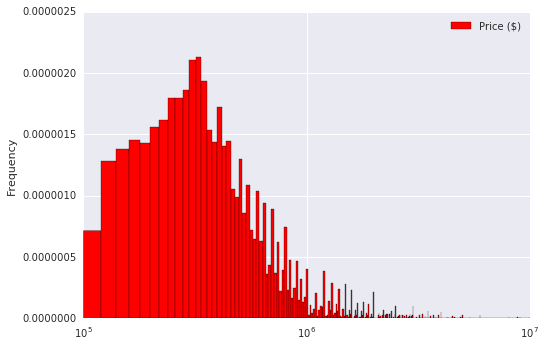

In [3]:
#Plot the histogram of property prices
#between $100,000 and $10,000,000
dfProp_filtered[(dfProp_filtered['Price ($)'] >= 100000)&(dfProp_filtered['Price ($)'] <= 10000000)][['Price ($)']].plot(kind='hist', color = 'red', logx=True, grid=True, normed = True, bins = 500)

plt.show()

In [4]:
counts_ = pd.DataFrame(dfProp_filtered['AreaName'].value_counts())
counts_.sort_values(by='AreaName')
bigAreas = list(counts_[0:19].index)
print('Top 20 Areas in terms of the number of properties: ', (bigAreas))

df_area = dfProp_filtered[dfProp_filtered['AreaName'].isin( bigAreas ) ]

Top 20 Areas in terms of the number of properties:  ['Downtown', 'Mississauga', 'Waterloo', 'Niagara Falls', 'Richmond Hill', 'Burlington', 'Willowdale', 'Brampton', 'Oakville', 'Midtown Toronto', 'Huntsville', 'Orléans', 'Kingston', 'Brantford', 'Peterborough', 'Kanata', 'Belleville', 'Ottawa', 'Windsor']


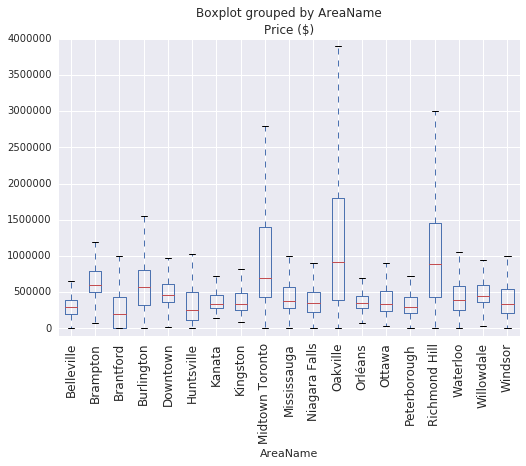

In [5]:
box_ax = df_area.boxplot(column='Price ($)', by='AreaName', grid=True, rot=90)
box_ax.set_ylim(-1e5, 4e6)

plt.show()

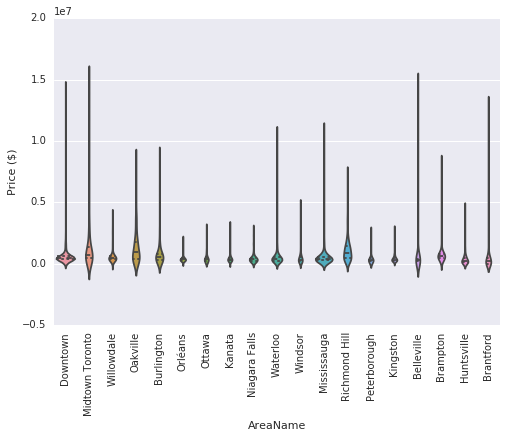

In [6]:
sb_ax = sb.violinplot(x=df_area['AreaName'], y=df_area['Price ($)'], grid = True, split=True, scale='count', inner='quartile')
plt.xticks(rotation=90)
#sb_ax.set_ylim(-1e5, 0.4e7)

plt.show()